## Competition - Spooky Author Identification
**Identify horror authors from their writings**

**File descriptions**

    train.csv - the training set
    test.csv - the test set
    sample_submission.csv - a sample submission file in the correct format

**Data fields**

    id - a unique identifier for each sentence
    text - some text written by one of the authors
    author - the author of the sentence (EAP: Edgar Allan Poe, HPL: HP Lovecraft; MWS: Mary Wollstonecraft Shelley)

# NLTK Experiments

## This notebook looks at experiments to include the results of the Grammer: Parts of Speech analysis from the Exploratory Data Analysis notebook

In [398]:
import numpy as np
import pandas as pd
import os
import itertools
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
# Set graph parameters
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [399]:
# Plot confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_conf_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [400]:
# Set the path of the spooky author dataset
SPOOKY_PATH = 'spooky'


def load_spooky_dataset(dataset_type):
    filepath = os.path.join(SPOOKY_PATH, dataset_type, dataset_type + ".csv")
    print(filepath)
    return pd.read_csv(filepath)

In [401]:
train = load_spooky_dataset("train")
test = load_spooky_dataset("test")

spooky\train\train.csv
spooky\test\test.csv


In [402]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train['text'], train['author'])
#X_train, y_train = train['text'], train['author']
#X_test = test['text']
#X_ID = test['id']

In [203]:
text = 'How is your studies? You should be studying.'
#text = train.text[1]

In [204]:
tokenized_text = nltk.word_tokenize(text)
tagged_text = [nltk.pos_tag(word) for word in tokenized_text]

In [205]:
wnl = WordNetLemmatizer()
# Reference : http://coling.epfl.ch/TP/TP-tagging.html
def get_wordnet_pos(universal_tag):
    if universal_tag == 'VERB':
        return wordnet.VERB
    elif universal_tag == 'ADJ':
        return wordnet.ADJ
    elif universal_tag == 'ADV':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmaToken(text):
    tokenized_text = nltk.word_tokenize(text)
    tagged_text = nltk.pos_tag(tokenized_text)
    print(tagged_text)
    lemma_text = []
    for item in tagged_text:
        #print(item[0], item[1])
        lemma_text.append(wnl.lemmatize(item[0], pos=get_wordnet_pos(item[1])))
    return lemma_text



In [206]:
print(tokenized_text)
print('Stem:',[EnglishStemmer().stem(word) for word in tokenized_text])
print('Lemmatize:',[WordNetLemmatizer().lemmatize(word) for word in tokenized_text])
lemmaToken(text)

['How', 'is', 'your', 'studies', '?', 'You', 'should', 'be', 'studying', '.']
Stem: ['how', 'is', 'your', 'studi', '?', 'you', 'should', 'be', 'studi', '.']
Lemmatize: ['How', 'is', 'your', 'study', '?', 'You', 'should', 'be', 'studying', '.']
[('How', 'WRB'), ('is', 'VBZ'), ('your', 'PRP$'), ('studies', 'NNS'), ('?', '.'), ('You', 'PRP'), ('should', 'MD'), ('be', 'VB'), ('studying', 'VBG'), ('.', '.')]


['How', 'is', 'your', 'study', '?', 'You', 'should', 'be', 'studying', '.']

In [602]:
#nltk.download()
sen = nltk.sent_tokenize(text)
print(sen)

['The 1 quick brown fox jumps over the 2 lazy dog']


In [606]:
sentences = [nltk.word_tokenize(sent) for sent in sen]
print(sentences)

[['The', '1', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', '2', 'lazy', 'dog']]


In [604]:
sentences = [nltk.pos_tag(sent) for sent in sentences]
print(sentences)

[[('The', 'DT'), ('1', 'CD'), ('quick', 'JJ'), ('brown', 'NN'), ('fox', 'NN'), ('jumps', 'VBZ'), ('over', 'IN'), ('the', 'DT'), ('2', 'CD'), ('lazy', 'NN'), ('dog', 'NN')]]


In [314]:
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
        
class LemmaTokenizer_c(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        # TODO check this
        #tokenized_text = [nltk.word_tokenize(w) for w in text]
        #tagged_text = [nltk.pos_tag(word_tokenize(text))]
        #print(tagged_text)
        #lemma_text = []
        #for item in tagged_text:
            #print(item)
            #for w in item:
                #print(w[0], w[1])
            #lemma_text.append(wnl.lemmatize(w[0], pos=get_wordnet_pos(w[1])) for w in item)
        #return lemma_text
        return [self.wnl.lemmatize(w[0], pos=get_wordnet_pos(w[1])) for w in pos_tag(word_tokenize(doc))]
    

In [315]:
vec1 = CountVectorizer(tokenizer=LemmaTokenizer())
vec2 = CountVectorizer(tokenizer=LemmaTokenizer_c())

In [316]:
text = ['How is your studies? You should be studying.']

In [317]:
vec1.fit_transform(text)

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [318]:
vec2.fit_transform(text)

<1x10 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [319]:
vec1.vocabulary_

{'.': 0,
 '?': 1,
 'be': 2,
 'how': 3,
 'is': 4,
 'should': 5,
 'study': 6,
 'studying': 7,
 'you': 8,
 'your': 9}

In [320]:
vec2.vocabulary_

{'.': 0,
 '?': 1,
 'be': 2,
 'how': 3,
 'is': 4,
 'should': 5,
 'study': 6,
 'studying': 7,
 'you': 8,
 'your': 9}

In [44]:
sample = 'For its introduction into common use for purposes of aerostation, we are indebted to Mr. Charles Green.'

def extract_entity_names(t):
    entity_names = []

    if hasattr(t, 'label') and t.label:
        if t.label() == 'NE':
            entity_names.append(' '.join([child[0] for child in t]))
        else:
            for child in t:
                entity_names.extend(extract_entity_names(child))

    return entity_names

sentences = nltk.sent_tokenize(sample)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
tagged_sentences = [nltk.pos_tag(sentence) for sentence in tokenized_sentences]
chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)

entities = []
for tree in chunked_sentences:
    entities.extend(extract_entity_names(tree))

print(entities)

['Mr. Charles Green']


In [24]:
import re
from sklearn.feature_extraction.text import CountVectorizer

In [391]:
test = ['Ok, tell me, was it really, worth the effort, please']

In [392]:
#ngram_range=(1, 2),
cvec = CountVectorizer(token_pattern='[,]*\w+[,]*', ngram_range=(1,3))
cvec.fit_transform(test)

<1x27 sparse matrix of type '<class 'numpy.int64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [393]:
cvec.vocabulary_

{'effort,': 0,
 'effort, please': 1,
 'it': 2,
 'it really,': 3,
 'it really, worth': 4,
 'me,': 5,
 'me, was': 6,
 'me, was it': 7,
 'ok,': 8,
 'ok, tell': 9,
 'ok, tell me,': 10,
 'please': 11,
 'really,': 12,
 'really, worth': 13,
 'really, worth the': 14,
 'tell': 15,
 'tell me,': 16,
 'tell me, was': 17,
 'the': 18,
 'the effort,': 19,
 'the effort, please': 20,
 'was': 21,
 'was it': 22,
 'was it really,': 23,
 'worth': 24,
 'worth the': 25,
 'worth the effort,': 26}

In [352]:
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='[,]*\\w+', tokenizer=None,
        vocabulary=None)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

#[,. ]*
#[,]*\w{1,}[,]*

# max_features=None, max_df=0.5, ngram_range=(1,2) norm='l2', use_idf=False alpha=0.01 0.852093973442 0.3763402815

# token_pattern='[,]*\w+', binary=True, ngram_range=(1,3) use_idf=False alpha=0.01 0.850663942799 0.385644965161
# token_pattern='[,]*\w+', binary=True, ngram_range=(1,2) use_idf=False alpha=0.01 0.857201225741 0.367171610854

#token_pattern='[,]*\w+', binary=True, max_df=0.5, ngram_range=(1,2) norm='l2', use_idf=False alpha=0.01
# 0.857405515832 0.367096405468

mnb_clf = Pipeline([
    ('vect', CountVectorizer(max_features=None, max_df=0.5, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=False)),
    ('clf', MultinomialNB(alpha=0.01)),
])

In [552]:
mnb_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [553]:
y_pred = mnb_clf.predict(X_test)
y_pred_prob = mnb_clf.predict_proba(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.852093973442
Log Loss: 0.3763402815


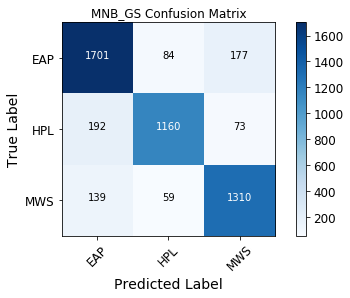

In [554]:
conf_mx = confusion_matrix(y_test, y_pred)
plot_conf_matrix(conf_mx, train.author.unique(), title="MNB_GS Confusion Matrix")

In [218]:
# http://scikit-learn.org/stable/modules/feature_extraction.html

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
        
class LemmaTokenizer_c(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        # TODO check this
        tokenized_text = nltk.word_tokenize(text)
        tagged_text = nltk.pos_tag(tokenized_text)
        lemma_text = []
        for item in tagged_text:
            print(item[0], item[1])
            lemma_text.append(wnl.lemmatize(item[0], pos=get_wordnet_pos(item[1])))
        return lemma_text


In [333]:
mnb_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer_c(), binary=True, ngram_range=(1, 2), token_pattern='[,]*\w+', max_df=0.5)),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=False)),
    ('clf', MultinomialNB(alpha=0.01)),
])

In [334]:
mnb_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [335]:
y_pred = mnb_clf.predict(X_test)
y_pred_prob = mnb_clf.predict_proba(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.863125638407
Log Loss: 0.34708790383


In [581]:
# max_features=None, max_df=0.5, ngram_range=(1,2) norm='l2', use_idf=False alpha=0.01 0.852093973442 0.3763402815

# token_pattern='[,]*\w+', binary=True, ngram_range=(1,3) use_idf=False alpha=0.01 0.850663942799 0.385644965161
# token_pattern='[,]*\w+', binary=True, ngram_range=(1,2) use_idf=False alpha=0.01 0.857201225741 0.367171610854

#token_pattern='[,]*\w+', binary=True, max_df=0.5, ngram_range=(1,2) norm='l2', use_idf=False alpha=0.01
# 0.857405515832 0.367096405468

#tokenizer=LemmaTokenizer(), binary=True, ngram_range=(1,2), token_pattern='[,]*\w+' norm='l2', use_idf=False alpha=0.01
# 0.853115423902 0.357860375266

#tokenizer=LemmaTokenizer(), binary=True, ngram_range=(1,2), token_pattern='[,]*\w+', max_df=0.5 norm='l2', use_idf=False alpha=0.01
# 0.866394279877 0.341726684642

#tokenizer=LemmaTokenizer_c(), binary=True, ngram_range=(1, 2), token_pattern='[,]*\w+', max_df=0.5 norm='l2', use_idf=False alpha=0.01

In [628]:
def create_submission_file(y_pred_prob, name):
    result = pd.DataFrame(y_pred_prob, columns=['EAP', 'HPL', 'MWS'])
    result.insert(0, 'id', X_ID)
    result.to_csv(name+'.csv', index=False, float_format='%.20f')

In [407]:
mnb_clf = Pipeline([
    ('vect', CountVectorizer(binary=True, ngram_range=(1,2), token_pattern='[,]*\w+', max_df=0.5)),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=False)),
    ('clf', MultinomialNB(alpha=0.01)),
])

In [408]:
mnb_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [409]:
y_pred = mnb_clf.predict(X_test)
y_pred_prob = mnb_clf.predict_proba(X_test)

In [410]:
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.855158324821
Log Loss: 0.361059190387


In [643]:
#create_submission_file(y_pred_prob, 'MNB_Lemma_max')

In [40]:
class StemTokenizer(object):
    def __init__(self):
        self.stemmer = EnglishStemmer()
    def __call__(self, doc):
        return [self.stemmer.stem(t) for t in word_tokenize(doc)]

In [74]:
mnb_clf = Pipeline([
    ('vect', CountVectorizer(tokenizer=LemmaTokenizer()), binary=True, ngram_range=(1,2), token_pattern='[,]*\w+', max_df=0.5)),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=False)),
    ('clf', MultinomialNB(alpha=0.01)),
])

In [75]:
mnb_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_...lse,
         use_idf=False)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [76]:
y_pred = mnb_clf.predict(X_test)
y_pred_prob = mnb_clf.predict_proba(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Log Loss:", log_loss(y_test, y_pred_prob))

Accuracy score: 0.863942798774
Log Loss: 0.348606592351
